In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

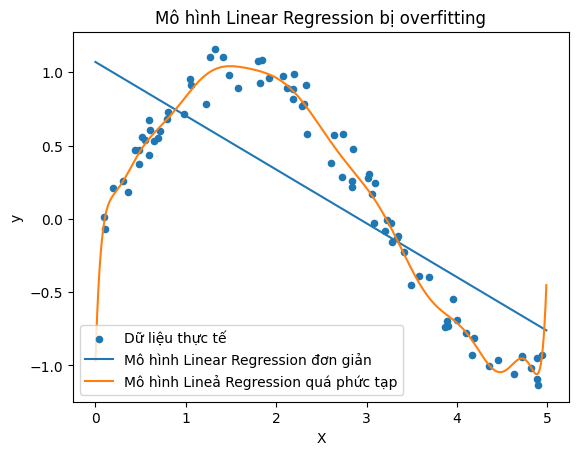

MSE (đơn giản) 0.1882160348595623
MSE (Phức tạp) 0.0075991508328983074


In [12]:
# Tạo dữ liệu giả định
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# sắp xếp lại dữ liệu
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# tạo mô hình linear regression đơn giản
model_simple = LinearRegression()
model_simple.fit(X,y)
y_pred_simple = model_simple.predict(X_test)

# tạo mô hình lineả regression quá phức tạp (sử dụng đa thức bậc cao)
poly_features = PolynomialFeatures(degree = 15)
X_poly = poly_features.fit_transform(X)
model_complex = LinearRegression()
model_complex.fit(X_poly, y)
X_test_poly = poly_features.transform(X_test)
y_pred_complex = model_complex.predict(X_test_poly)

# vẽ biểu đồ dữ liệu và dự đoán của cả hai mô hình
plt.scatter(X, y, s=20, label='Dữ liệu thực tế')
plt.plot(X_test, y_pred_simple, label = 'Mô hình Linear Regression đơn giản')
plt.plot(X_test, y_pred_complex, label='Mô hình Lineả Regression quá phức tạp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Mô hình Linear Regression bị overfitting')
plt.show()

# đô độ tốt của mô hình bằng mean square

mse_simple = mean_squared_error(y,model_simple.predict(X))
mse_complex = mean_squared_error(y, model_complex.predict(X_poly))

print("MSE (đơn giản)", mse_simple)
print("MSE (Phức tạp)", mse_complex)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.58909e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+00, tolerance: 3.764e-03
  model = cd_fast.enet_coordinate_descent(


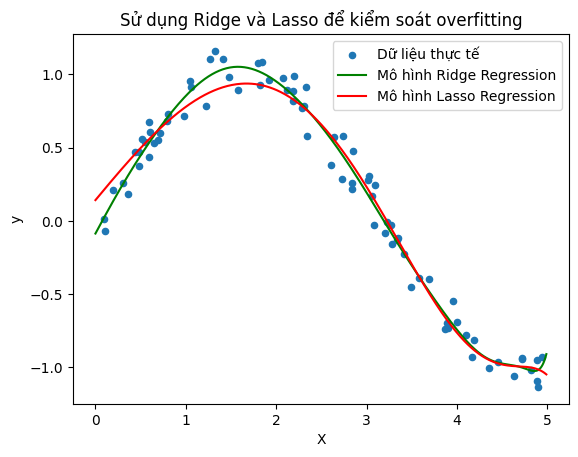

MSE (Ridge): 0.008286517553777151
MSE (Lasso): 0.01213071367257706


In [13]:
from sklearn.linear_model import Ridge, Lasso

# Sử dụng Ridge Regression để kiểm soát overfitting
ridge_model = Ridge(alpha=0.01)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
ridge_model.fit(X_poly, y)
y_pred_ridge = ridge_model.predict(X_test_poly)

# Sử dụng Lasso Regression để kiểm soát overfitting
lasso_model = Lasso(alpha=0.01)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
lasso_model.fit(X_poly, y)
y_pred_lasso = lasso_model.predict(X_test_poly)

# Vẽ biểu đồ dữ liệu và dự đoán của cả hai mô hình
plt.scatter(X, y, s=20, label='Dữ liệu thực tế')
plt.plot(X_test, y_pred_ridge, label='Mô hình Ridge Regression', color='g')
plt.plot(X_test, y_pred_lasso, label='Mô hình Lasso Regression', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Sử dụng Ridge và Lasso để kiểm soát overfitting')
plt.show()

# Đo độ tốt của mô hình bằng Mean Squared Error
mse_ridge = mean_squared_error(y, ridge_model.predict(X_poly))
mse_lasso = mean_squared_error(y, lasso_model.predict(X_poly))

print("MSE (Ridge):", mse_ridge)
print("MSE (Lasso):", mse_lasso)

In [14]:
np.round(model_complex.coef_, 2)


array([ 0.00000e+00,  1.90600e+01, -1.41330e+02,  5.91240e+02,
       -1.49637e+03,  2.46416e+03, -2.77183e+03,  2.19945e+03,
       -1.25614e+03,  5.21460e+02, -1.57340e+02,  3.41200e+01,
       -5.18000e+00,  5.20000e-01, -3.00000e-02,  0.00000e+00])

In [15]:
np.round(ridge_model.coef_, 2)

array([ 0.  ,  1.16, -0.1 , -0.23,  0.08,  0.19, -0.09, -0.24,  0.27,
       -0.09, -0.01,  0.02, -0.01,  0.  , -0.  ,  0.  ])

In [16]:
np.round(lasso_model.coef_, 2)

array([ 0.  ,  0.74, -0.03, -0.08, -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  , -0.  , -0.  , -0.  , -0.  , -0.  ])